# 16장 mosfet
Python Programming And Numerical Methods: A Guide For Engineers And Scientists
https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/Index.html

In [2]:
import numpy as np, matplotlib.pyplot as plt

def my_bisection(f, a, b, tol): 
    if np.sign(f(a)) == np.sign(f(b)): raise Exception("The scalars a and b do not bound a root")
    m = (a + b)/2
    if np.abs(f(m)) < tol: return m
    elif np.sign(f(a)) == np.sign(f(m)): return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)): return my_bisection(f, a, m, tol)

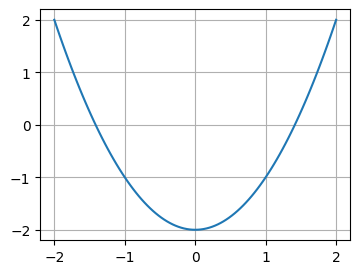

r1 = 1.4142136573791504
r01 = -1.4142136573791504
f(r1) = 2.687177129701013e-07
f(r01) = 2.687177129701013e-07


In [3]:
x = np.linspace(-2, 2, 101)
f = lambda x: x**2 - 2 # f가 lambda일 수 밖에 없는 이유는 my_bisection 함수에서 f(a)를 사용하고 있다.
#f=x**2-2

plt.figure(figsize=(4,3))
plt.plot(x,f(x))
#plt.plot(x,f)
plt.grid()
plt.show()

r1 = my_bisection(f, 0, 2, 1e-6) # 양의 실수
print("r1 =", r1)
r01 = my_bisection(f, -2, 0, 1e-6) # 음의 수수
print("r01 =", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))

r1 = 1.4142136573791504
f(r1) = 2.687177129701013e-07


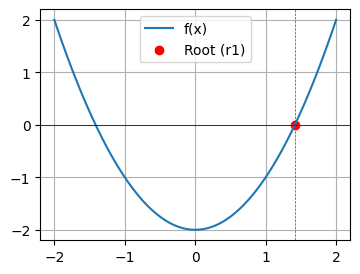

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
f = lambda x: x**2 - 2

# x 값 생성
x = np.linspace(-2, 2, 101)

# 그래프 그리기
plt.figure(figsize=(4,3))
plt.plot(x, f(x), label="f(x)")

# 이진법(bisection method)으로 찾은 근
r1 = my_bisection(f, 0, 2, 1e-6)  # 양의 실수 근
print("r1 =", r1)
print("f(r1) =", f(r1))
# r1을 그래프에 추가 (보간점)
plt.scatter(r1, f(r1), color='red', label="Root (r1)")
plt.axhline(0, color='black', linewidth=0.5)  # x축 표시
plt.axvline(r1, color='red', linestyle='--', linewidth=0.5)  # 근의 위치 표시

plt.grid()
plt.legend()
plt.show()


r1 = 1.4141843971631205
r1i = 1.4141843971631205


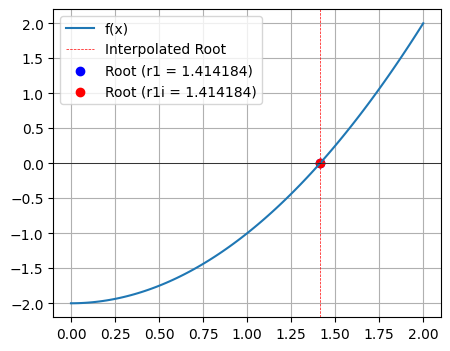

In [11]:
# 선형보간법
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
f = lambda x: x**2 - 2

# x 값 생성
x = np.linspace(0, 2, 101)  # 0부터 2까지 101개 점 생성
y = f(x)

# f(x) 값이 0에 가까운 두 점 찾기
for i in range(len(x)-1):
    if y[i] * y[i+1] < 0:  # 부호가 바뀌는 구간 찾기
        x1, x2 = x[i], x[i+1]
        y1, y2 = y[i], y[i+1]
        break  # 첫 번째 근을 찾으면 멈춤

# 선형 보간법으로 근 구하기
r1 = x1 - y1 * (x2 - x1) / (y2 - y1)
print("r1 =", r1)

# numpy.interp를 이용한 보간법 적용
r1i = np.interp(0, [y1, y2], [x1, x2])
print("r1i =", r1i)

# 그래프 그리기
plt.figure(figsize=(5,4))
plt.plot(x, y, label="f(x)")
plt.axhline(0, color='black', linewidth=0.5)  # x축 표시
plt.axvline(r1i, color='red', linestyle='--', linewidth=0.5, label="Interpolated Root")
plt.scatter(r1, 0, color='blue', label=f"Root (r1 = {r1:.6f})")  # 근을 점으로 표시
plt.scatter(r1i, 0, color='red', label=f"Root (r1i = {r1i:.6f})")  # 근을 점으로 표시

plt.grid()
plt.legend()
plt.show()
